#Idea:


In [1]:
#/home/pui_user/PUI2018_msm796/HW4_msm796
#declare libraries
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import datetime
from dateutil.relativedelta import relativedelta #DOWNLOAD THIS PACKAGE#
import os
import requests #DOWNLOAD THIS PACKAGE#
import zipfile #DOWNLOAD THIS PACKAGE#
import io #DOWNLOAD THIS PACKAGE#
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import subprocess as sp
import os

#library#
    
#declare parameters
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

#declare helper functions
def download_citibike_data(yearstart,yearend,monthstart,monthend,output_path):
    '''
    change log:
    
    version 1.0 - Downloads citibike datasets zip files and unzips them. does checking if file already
    exists in path. currently has no input error handling logic.
    ---------------------------------------------------------------------------------------------
    Parameters:
    name - type - description
    yearstart - <int> - refers to the year where you want your download to start
    yearend - <int> - refers to the year where you want your download to start
    monthstart - <int> - refers to the month ssociated with yearstart where you want your download to start
    monthend - <int> - refers to the month associated with yearend where you want your download to start
    outputpath - <str> - refers to location where you want to dump the csv files
    
    example usage:
    download_citibike_data(2013,2018,6,8,puidata)
    - this downloads the citibike datasets from June 2013 to August 2018. Files will be unzipped at
    the puidata location.
    
    required libraries:
    datautil - required for year & month generation
    requests - for downloading the zip file
    zipfile - to unzip the file
    io - to read binary data and give it to zipfile; effectly keeping the entire process in memory
    '''
    #might include in error handling in the future for incorrect input
    curr_date = start_date=datetime.datetime(yearstart,monthstart,1).date()
    end_date=datetime.datetime(yearend,monthend,1).date()
    year_month=[start_date.strftime('%Y%m')]
    base_citi_url='https://s3.amazonaws.com/tripdata/'
    while curr_date < end_date:
        curr_date += relativedelta(months=1)
        year_month.append(curr_date.strftime('%Y%m'))
    for x in year_month:
    #need to change logic as csv filename convention isn't done properly#
    #will just base on dates found in directory#
        filename=x+"-citibike-tripdata.csv"
        if os.path.isfile(output_path+"/"+filename)==True:
            print("{} already exists!".format(filename))
        else:
            print("Downloading {}".format(filename))
            year=int(x[:4])
            if year>=2017:
                ending=".csv.zip"
            else:
                ending=".zip"
            url=base_citi_url+x+"-citibike-tripdata"+ending
            r = requests.get(url, stream=True)
            z = zipfile.ZipFile(io.BytesIO(r.content))
            z.extractall(output_path)
            
def append_all_citi_bike_data(input_path):
    '''
    developer's notes:
    please refactor me! thanks!
    change log:
    
    version 1.0 -currently has no input error handling logic or checking if file exists.

    Parameters:
    name - type - description
    
    input_path - <str> - location where the csv files are stored
    -Naively appends all files into one superfile
    
    required libraries:
    pandas - the output will be a dataframe, also used to load the files
    '''
    #currently implementing
    files_directory=os.listdir(input_path)
    csv_files = [x for x in files_directory if (".csv" in x) & (("citi" in x) | ("Citi" in x))]
    super_csv = pd.concat([pd.io.parsers.read_csv(input_path+"/"+f,engine='c',memory_map=True,low_memory='dtype') for f in csv_files],sort=False)
#    super_csv = pd.concat([pd.read_csv(input_path+"/"+f,engine='c',memory_map=True,low_memory='dtype') for f in csv_files])
    return super_csv

In [158]:
#files_directory=os.listdir(puidata)
csv_files = [x for x in files_directory if (".csv" in x) & (("citi" in x) | ("Citi" in x))]
print(csv_files)
print(len(csv_files))

['201706-citibike-tripdata.csv', '201711-citibike-tripdata.csv', '201710-citibike-tripdata.csv', '201701-citibike-tripdata.csv', '201705-citibike-tripdata.csv', '201709-citibike-tripdata.csv', '201708-citibike-tripdata.csv', '201712-citibike-tripdata.csv', '201702-citibike-tripdata.csv', '201707-citibike-tripdata.csv', '201703-citibike-tripdata.csv', '201704-citibike-tripdata.csv']
12


In [162]:
#downloads from beginning to latest available as of late September
#download_citibike_data(2016,2016,1,12,puidata)
#complete_set=append_all_citi_bike_data(puidata)

In [2]:
#complete_set.to_csv(puidata+'/complete_bike_as_of_201808.csv')
#complete_set.to_csv(puidata+'/complete_2016_bike.csv')
complete_set2=pd.read_csv(puidata+'/complete_2017_bike.csv',engine='c',memory_map=True,low_memory='dtype')

/nfshome/msm796/.conda/envs/loltestz/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,5,9,13,17,18,20,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [164]:
len(complete_set)

13845655

In [165]:
complete_set.columns.get_values()

array(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'birth year', 'gender', 'Trip Duration', 'Start Time',
       'Stop Time', 'Start Station ID', 'Start Station Name',
       'Start Station Latitude', 'Start Station Longitude',
       'End Station ID', 'End Station Name', 'End Station Latitude',
       'End Station Longitude', 'Bike ID', 'User Type', 'Birth Year',
       'Gender'], dtype=object)

In [167]:
#complete_set.head(100)
complete_set[pd.isnull(complete_set['Gender']==False)]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender


In [168]:
drop_cols=[x for x in complete_set.columns.get_values() if x not in ['bikeid', 'birth year','end station id','end station latitude','end station longitude','end station name','gender','start station id','start station','latitude','start station','longitude','start station name','starttime','stoptime','tripduration','usertype']]
complete_set2=complete_set.drop(drop_cols,axis=1)

In [139]:
complete_set2.head(10)

,Unnamed: 0,bikeid,birth year,end station id,end station latitude,end station longitude,end station name,gender,start station id,start station name,starttime,stoptime,tripduration,usertype
0,0,26642.0,1967.0,3285.0,40.788390,-73.974700,W 87 St & Amsterdam Ave,1.0,515.0,W 43 St & 10 Ave,2017-06-01 00:00:02,2017-06-01 00:23:19,1397.0,Subscriber
1,1,25656.0,1981.0,297.0,40.734232,-73.986923,E 15 St & 3 Ave,1.0,488.0,W 39 St & 9 Ave,2017-06-01 00:00:13,2017-06-01 00:18:37,1103.0,Subscriber
2,2,21023.0,1982.0,465.0,40.755136,-73.986580,Broadway & W 41 St,1.0,461.0,E 20 St & 2 Ave,2017-06-01 00:00:20,2017-06-01 00:30:31,1810.0,Subscriber
3,3,25718.0,1973.0,527.0,40.744023,-73.976056,E 33 St & 2 Ave,2.0,2009.0,Catherine St & Monroe St,2017-06-01 00:00:24,2017-06-01 00:29:45,1760.0,Subscriber
4,4,18691.0,1985.0,474.0,40.745168,-73.986831,5 Ave & E 29 St,1.0,360.0,William St & Pine St,2017-06-01 00:00:33,2017-06-01 00:36:38,2165.0,Subscriber
5,5,20729.0,1976.0,3386.0,40.680959,-73.999057,1 Pl & Clinton St,1.0,310.0,State St & Smith St,2017-06-01 00:00:37,2017-06-01 00:10:45,608.0,Subscriber
6,6,27900.0,1987.0,3255.0,40.750585,-73.994685,8 Ave & W 31 St,1.0,284.0,Greenwich Ave & 8 Ave,2017-06-01 00:00:40,2017-06-01 00:07:36,416.0,Subscriber
7,7,20813.0,1985.0,366.0,40.693261,-73.968896,Clinton Ave & Myrtle Ave,1.0,258.0,DeKalb Ave & Vanderbilt Ave,2017-06-01 00:01:08,2017-06-01 00:08:02,414.0,Subscriber
8,8,16478.0,1988.0,473.0,40.721101,-73.991925,Rivington St & Chrystie St,1.0,433.0,E 13 St & Avenue A,2017-06-01 00:01:11,2017-06-01 00:08:00,408.0,Subscriber
9,9,26763.0,1993.0,476.0,40.743943,-73.979661,E 31 St & 3 Ave,1.0,309.0,Murray St & West St,2017-06-01 00:01:14,2017-06-01 00:24:20,1386.0,Subscriber


In [169]:
#complete_set2.to_csv(puidata+'/complete_2017_bike.csv')
complete_set2.dtypes

tripduration             float64
starttime                 object
stoptime                  object
start station id         float64
start station name        object
end station id           float64
end station name          object
end station latitude     float64
end station longitude    float64
bikeid                   float64
usertype                  object
birth year               float64
gender                   float64
dtype: object

In [170]:
#seperating observations with NaN birth year 
age_2017=complete_set2[pd.isnull(complete_set2['birth year'])==False]
ageless_2017=complete_set2[pd.isnull(complete_set2['birth year'])==True]
#complete_set2['age']=

In [171]:
len(age_2017)

8979304

In [172]:
len(ageless_2017)

4866351

In [173]:
pct_missing_birth=float(len(ageless_2017))/float(len(complete_set2))
pct_birth=float(len(age_2017))/float(len(complete_set2))
print("{:.2%} % of the original dataset without birth year field".format(pct_missing_birth))
print("{:.2%} % of the original dataset with birth year field".format(pct_birth))

35.15% % of the original dataset without birth year field
64.85% % of the original dataset with birth year field


In [174]:
#create age field
#assumptions:
#the age will be integerized, meaning, since only birth year is given then subtracting 2017 by an observation's year implies
#that a person is born in 01-01-<year>, which is unrealistic however...
age_2017['age']=(2017.0-age_2017['birth year']).astype(int)

/nfshome/msm796/.conda/envs/loltestz/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [175]:
age_2017.head(10)

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,538.0,5/1/2016 00:00:03,5/1/2016 00:09:02,536.0,1 Ave & E 30 St,497.0,E 17 St & Broadway,40.737050,-73.990093,23097.0,Subscriber,1986.0,2.0,31
1,224.0,5/1/2016 00:00:04,5/1/2016 00:03:49,361.0,Allen St & Hester St,340.0,Madison St & Clinton St,40.712690,-73.987763,23631.0,Subscriber,1977.0,1.0,40
2,328.0,5/1/2016 00:00:14,5/1/2016 00:05:43,301.0,E 2 St & Avenue B,311.0,Norfolk St & Broome St,40.717227,-73.988021,23049.0,Subscriber,1980.0,1.0,37
4,753.0,5/1/2016 00:00:26,5/1/2016 00:13:00,492.0,W 33 St & 7 Ave,228.0,E 48 St & 3 Ave,40.754601,-73.971879,16437.0,Subscriber,1981.0,1.0,36
5,511.0,5/1/2016 00:00:33,5/1/2016 00:09:05,445.0,E 10 St & Avenue A,537.0,Lexington Ave & E 24 St,40.740259,-73.984092,20592.0,Subscriber,1991.0,1.0,26
6,362.0,5/1/2016 00:00:34,5/1/2016 00:06:37,151.0,Cleveland Pl & Spring St,229.0,Great Jones St,40.727434,-73.993790,15681.0,Subscriber,1986.0,1.0,31
7,1399.0,5/1/2016 00:00:37,5/1/2016 00:23:56,161.0,LaGuardia Pl & W 3 St,2022.0,E 60 St & York Ave,40.759107,-73.959223,16003.0,Subscriber,1989.0,1.0,28
8,515.0,5/1/2016 00:00:42,5/1/2016 00:09:17,368.0,Carmine St & 6 Ave,334.0,W 20 St & 7 Ave,40.742388,-73.997262,20515.0,Subscriber,1998.0,1.0,19
9,1477.0,5/1/2016 00:00:50,5/1/2016 00:25:27,459.0,W 20 St & 11 Ave,445.0,E 10 St & Avenue A,40.727408,-73.981420,20884.0,Subscriber,1995.0,1.0,22
10,531.0,5/1/2016 00:00:54,5/1/2016 00:09:45,151.0,Cleveland Pl & Spring St,328.0,Watts St & Greenwich St,40.724055,-74.009660,21170.0,Subscriber,1962.0,1.0,55


In [176]:
ageless_2017.head(10)

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
3,1196.0,5/1/2016 00:00:20,5/1/2016 00:20:17,3141.0,1 Ave & E 68 St,237.0,E 11 St & 2 Ave,40.730473,-73.986724,19019.0,Customer,NaN,0.0
13,1164.0,5/1/2016 00:01:03,5/1/2016 00:20:27,3141.0,1 Ave & E 68 St,237.0,E 11 St & 2 Ave,40.730473,-73.986724,23218.0,Customer,NaN,0.0
18,388.0,5/1/2016 00:01:28,5/1/2016 00:07:56,323.0,Lawrence St & Willoughby St,3222.0,Hanson Pl & St Felix St,40.685160,-73.977114,21394.0,Customer,NaN,0.0
19,553.0,5/1/2016 00:01:31,5/1/2016 00:10:45,453.0,W 22 St & 8 Ave,297.0,E 15 St & 3 Ave,40.734232,-73.986923,23898.0,Customer,NaN,0.0
23,1220.0,5/1/2016 00:02:06,5/1/2016 00:22:26,352.0,W 56 St & 6 Ave,526.0,E 33 St & 5 Ave,40.747659,-73.984907,20168.0,Customer,NaN,0.0
25,800.0,5/1/2016 00:02:19,5/1/2016 00:15:40,127.0,Barrow St & Hudson St,523.0,W 38 St & 8 Ave,40.754666,-73.991382,23960.0,Customer,NaN,0.0
26,1628.0,5/1/2016 00:02:19,5/1/2016 00:29:27,515.0,W 43 St & 10 Ave,326.0,E 11 St & 1 Ave,40.729538,-73.984267,22047.0,Customer,NaN,0.0
29,1175.0,5/1/2016 00:02:50,5/1/2016 00:22:26,352.0,W 56 St & 6 Ave,526.0,E 33 St & 5 Ave,40.747659,-73.984907,23792.0,Customer,NaN,0.0
30,269.0,5/1/2016 00:02:48,5/1/2016 00:07:17,263.0,Elizabeth St & Hester St,355.0,Bayard St & Baxter St,40.716021,-73.999744,20325.0,Customer,NaN,0.0
31,1037.0,5/1/2016 00:03:01,5/1/2016 00:20:18,247.0,Perry St & Bleecker St,319.0,Fulton St & Broadway,40.711066,-74.009447,17286.0,Customer,NaN,0.0


# histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ca7597320>]],
      dtype=object)

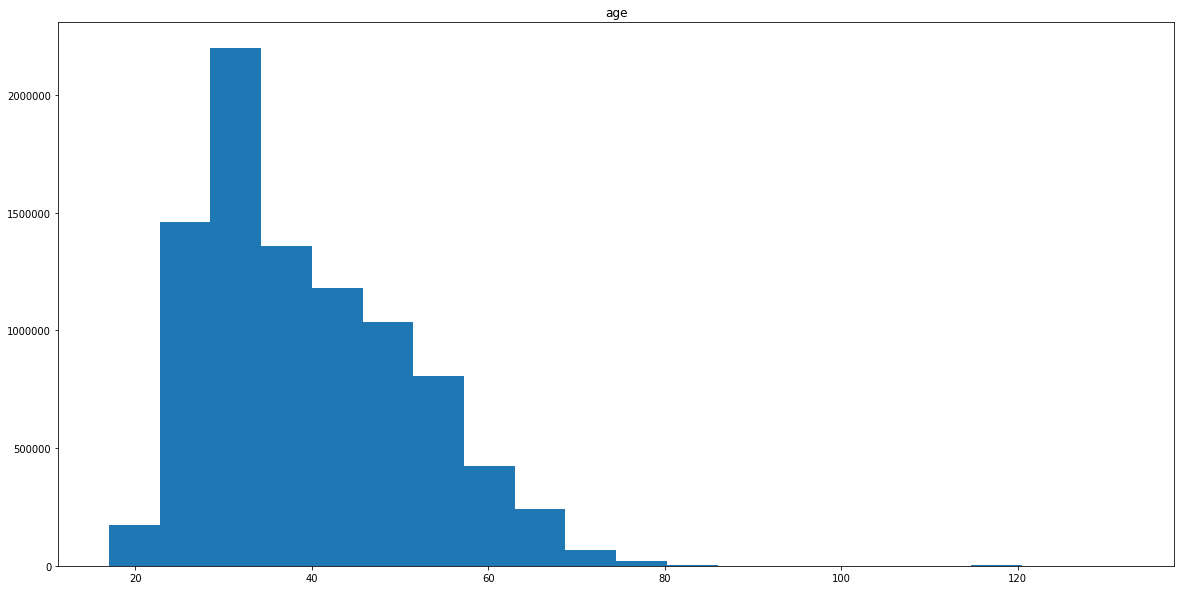

In [177]:
age_2017.hist(column='age',grid=False,bins=20,figsize=(20,10))

In [178]:
age_2017[age_2017['age']>80].head()

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
857,311.0,5/1/2016 02:56:52,5/1/2016 03:02:04,357.0,E 11 St & Broadway,511.0,E 14 St & Avenue B,40.729387,-73.977724,21489.0,Subscriber,1900.0,1.0,117
1302,990.0,5/1/2016 07:29:37,5/1/2016 07:46:07,388.0,W 26 St & 10 Ave,249.0,Harrison St & Hudson St,40.718710,-74.009001,24065.0,Subscriber,1936.0,1.0,81
1625,345.0,5/1/2016 08:34:06,5/1/2016 08:39:52,264.0,Maiden Ln & Pearl St,308.0,St James Pl & Oliver St,40.713079,-73.998512,15731.0,Subscriber,1932.0,2.0,85
9857,657.0,5/1/2016 21:22:43,5/1/2016 21:33:40,411.0,E 6 St & Avenue D,251.0,Mott St & Prince St,40.723180,-73.994800,24345.0,Subscriber,1918.0,1.0,99
13913,1084.0,5/2/2016 07:53:16,5/2/2016 08:11:21,511.0,E 14 St & Avenue B,337.0,Old Slip & Front St,40.703799,-74.008387,22980.0,Subscriber,1900.0,1.0,117


In [180]:
#validating trip duration
age_2017['valid_dur']=age_2017['stoptime'].astype('datetime64[ns]')-age_2017['starttime'].astype('datetime64[ns]')
age_2017.head(5)

KeyboardInterrupt: 

In [ ]:
#create day field
#age_2017['day_start'] = age_2017['starttime'].astype('datetime64[ns]').apply(lambda x: x.weekday())
#age_2017['day_end'] = age_2017['stoptime'].astype('datetime64[ns]').apply(lambda x: x.weekday())
age_2017['day_start'] = age_2017['starttime'].astype('datetime64[ns]').apply(lambda x: x.strftime('%A'))
age_2017['day_end'] = age_2017['stoptime'].astype('datetime64[ns]').apply(lambda x: x.strftime('%A'))
age_2017['month'] = age_2017['starttime'].astype('datetime64[ns]').apply(lambda x: x.strftime('%B'))

In [ ]:
#get summary statistics of age and valid_dur
age_2017.loc[:,['valid_dur','age']].describe()
#something is super wrong with describe and age. i noticed it shifted the decimal or divded by 10??????

In [ ]:
import random as rd
age_2017.iloc[rd.sample(range(len(age_2017)),50),]

In [ ]:
age_2017.loc[:,['day_start','age']].groupby(['day_start']).size()
#weekends tend to have fewer ridership

In [ ]:
age_2017.loc[:,['day_start','valid_dur']].groupby(['day_start']).describe()
#for x in ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']:
#    age_2017[age_2017['day_start']==x].loc[:,['valid_durr']].describe()

In [ ]:
age_2017.loc[:,['valid_dur','month']].groupby(['month']).describe()